In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from PIL import Image

In [403]:
df = pd.read_pickle("../2020_2/monkey_longterm_visualization/all_nooverlap_vaddetected.zip")
df["break"]=0

In [391]:
def setbreak(df,duration):
    for i in range(len(df)-1):
        duration_ = (pd.to_datetime(df.iloc[i+1]["datetime"])-pd.to_datetime(df.iloc[i]["datetime"])).seconds
        duration_-=df.iloc[i]["duration"]
        if duration_>duration:
            df.iloc[i,11]=1
    return df

In [392]:
def getlimitdata(data_,starttime,endtime):
    timearray = data_.index.indexer_between_time(starttime,endtime)
    temp = data_.iloc[timearray]
    return temp

In [401]:
def getTEarray(df,start_time,end_time,duration):
    data = setbreak(df,duration)
    data_temp =getlimitdata(data,start_time,end_time)
    result = creatarray(data_temp)
    return result

In [400]:
def creatarray(data):
    result = []
    for i in range(len(data)):
        temp = [0]*3
        temp[data.iloc[i]["individual"]-1]= 1
        result.append(temp)
        if data.iloc[i]["break"]==1:
            result.append([0]*3)
    return result

In [404]:
alldata = setbreak(df,10)

In [406]:
data_06_07 = getlimitdata(alldata,"06:00:00","07:00:00")
data_07_08 =getlimitdata(alldata,"07:00:00","08:00:00")
data_08_09 =getlimitdata(alldata,"08:00:00","09:00:00")
data_09_10 =getlimitdata(alldata,"09:00:00","10:00:00")

In [408]:
data_sep = [data_06_07,data_07_08,data_08_09,data_09_10]

In [439]:
data_07_08

,id,datetime,time,duration,azimuth_mean,power_mean,cage,vad_count,overlapped_count,layout,individual,break
datetimeindex,,,,,,,,,,,,
2019-06-14 07:00:07.000,1,2019-06-14 07:00:07.000,6.0,4.4,138.108117,27.040181,3,7,1,B,2,0
2019-06-14 07:00:17.400,4,2019-06-14 07:00:17.400,16.4,3.3,0.237674,27.186764,2,5,0,B,1,0
2019-06-14 07:00:29.800,7,2019-06-14 07:00:29.800,28.8,4.3,136.728718,27.229117,3,5,0,B,2,0
2019-06-14 07:00:43.700,12,2019-06-14 07:00:43.700,42.7,4.9,-0.603248,27.103729,2,6,0,B,1,0
2019-06-14 07:00:49.600,13,2019-06-14 07:00:49.600,48.6,4.7,-123.672871,28.352402,1,8,0,B,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03 07:46:36.200,256,2020-01-03 07:46:36.200,994.2,4.2,-1.273230,26.759335,2,6,1,A,2,0
2020-01-03 07:46:41.800,258,2020-01-03 07:46:41.800,999.8,4.6,-26.754015,26.704387,2,4,0,A,2,0
2020-01-03 07:46:52.600,259,2020-01-03 07:46:52.600,1010.6,13.3,-9.785013,26.800763,2,20,0,A,2,0


In [409]:
all_result = []
for i in data_sep:
    all_result.append(creatarray(i))


In [413]:
all ={}
time = ["time 06--07","time 07--08","time 08--09","time 09--10"]
for i in range(len(time)):
    all[time[i]] =all_result[i]

In [422]:
for i in all.keys():
    print(i)

time 06--07
time 07--08
time 08--09
time 09--10


Adding data with properties: 3 processes, 8155 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2]

Target: 0 - testing sources [1, 2]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
testing candidate: (2, 2) maximum statistic, n_perm: 200
testing candidate: (2, 1) maximum statistic, n_perm: 200
testing candidate: (1, 3) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
se

<IPython.core.display.Javascript object>


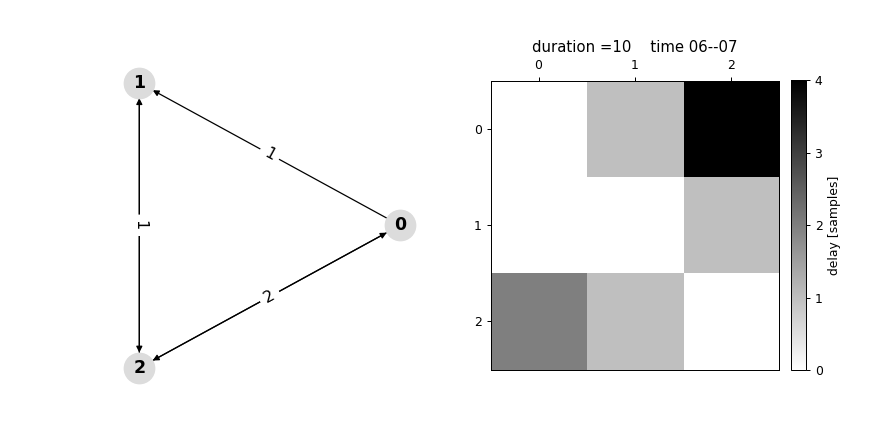

Adding data with properties: 3 processes, 42954 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2]

Target: 0 - testing sources [1, 2]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
testing candidate: (2, 1) maximum statistic, n_perm: 200
testing candidate: (1, 1) maximum statistic, n_perm: 200
testing candidate: (2, 2) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200
testing candidate: (2

<IPython.core.display.Javascript object>


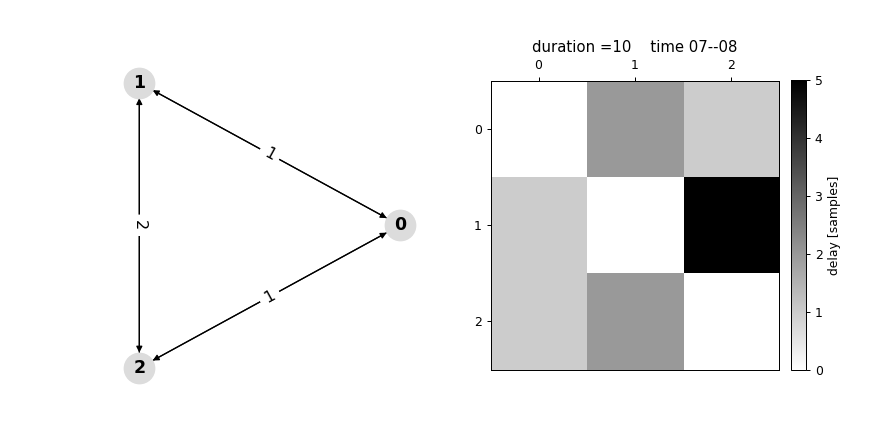

Adding data with properties: 3 processes, 26256 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2]

Target: 0 - testing sources [1, 2]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
testing candidate: (2, 1) maximum statistic, n_perm: 200
testing candidate: (2, 2) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200
testing candidate: (2, 3) maximum statistic, n_perm: 200
testing candidate: (1

<IPython.core.display.Javascript object>


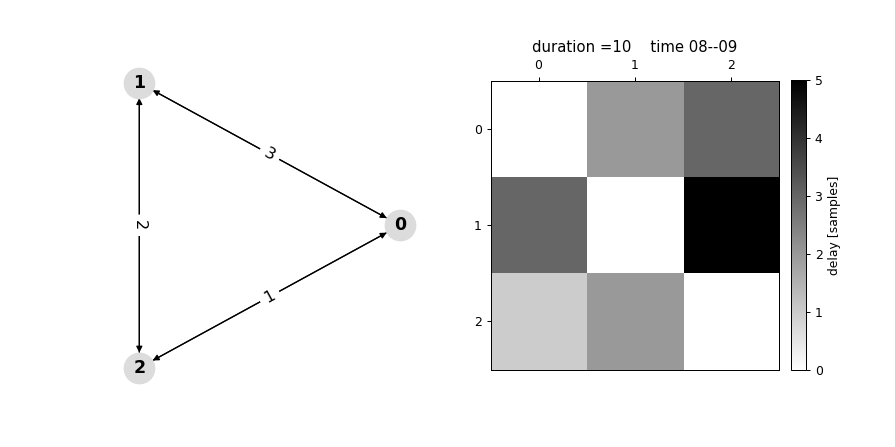

Adding data with properties: 3 processes, 4969 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2]

Target: 0 - testing sources [1, 2]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
testing candidate: (1, 2) maximum statistic, n_perm: 200
testing candidate: (2, 2) maximum statistic, n_perm: 200
testing candidate: (2, 1) maximum statistic, n_perm: 200
testing candidate: (1, 1) maximum statistic, n_perm: 200
testing candidate: (2,

<IPython.core.display.Javascript object>


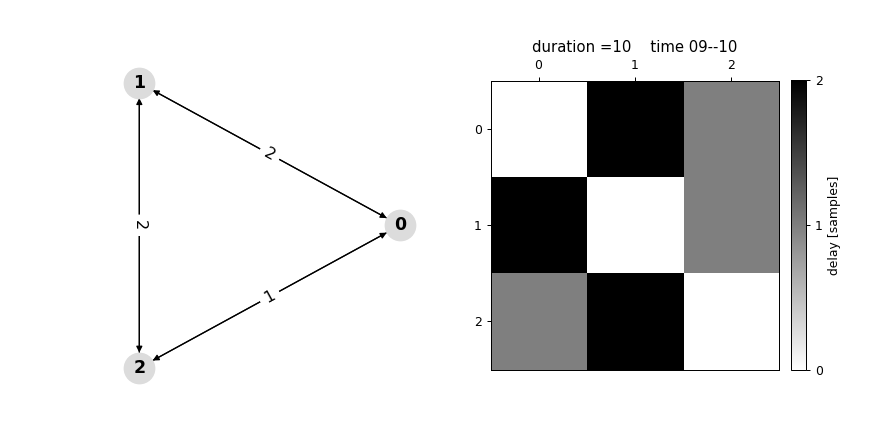

In [440]:
%matplotlib notebook
#This example analysis is obtained and modified from:
#

# Import classes
from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


# a) Generate test data
#data = Data()
#data.generate_mute_data(n_samples=1000, n_replications=5)

#d= np.loadtxt("singingdynamics2.txt")
for result in all.keys():
    d= np.array(all[result])
    data = Data(d, dim_order='sp')


# b) Initialise analysis object and define settings
    network_analysis = MultivariateTE()
    settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 5,
            'min_lag_sources': 1}

# c) Run analysis
    results = network_analysis.analyse_network(settings=settings, data=data)

# d) Plot inferred network to console and via matplotlib
    results.print_edge_list(weights='max_te_lag', fdr=False)
    plot_network(results=results, weights='max_te_lag', fdr=False)
    plt.title("duration =10    "+result)
    plt.show()
    plt.savefig(result)